/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=0.01: Precision = 0.723, AUC = 0.828
C=0.01: F1 Score for validation data = 0.743
C=0.01: Precision = 0.744, AUC = 0.820


/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=0.1: Precision = 0.722, AUC = 0.832
C=0.1: F1 Score for validation data = 0.742
C=0.1: Precision = 0.748, AUC = 0.823


/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=1.0: Precision = 0.721, AUC = 0.828
C=1.0: F1 Score for validation data = 0.748
C=1.0: Precision = 0.748, AUC = 0.820
C=10: Precision = 0.727, AUC = 0.828
C=10: F1 Score for validation data = 0.743
C=10: Precision = 0.748, AUC = 0.819
C=50: Precision = 0.724, AUC = 0.827
C=50: F1 Score for validation data = 0.747
C=50: Precision = 0.742, AUC = 0.818
C=100: Precision = 0.727, AUC = 0.828
C=100: F1 Score for validation data = 0.742
C=100: Precision = 0.749, AUC = 0.820

Best C for AUC: 0.1 with AUC = 0.832
Best C for Precision: 10 with Precision = 0.727
Best C value based on F1 Score for validation data: 1.0 with F1 Score = 0.748

Best C for AUC: 0.1 with AUC = 0.823
Best C for Precision: 100 with Precision = 0.749


/home/ubuntu/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


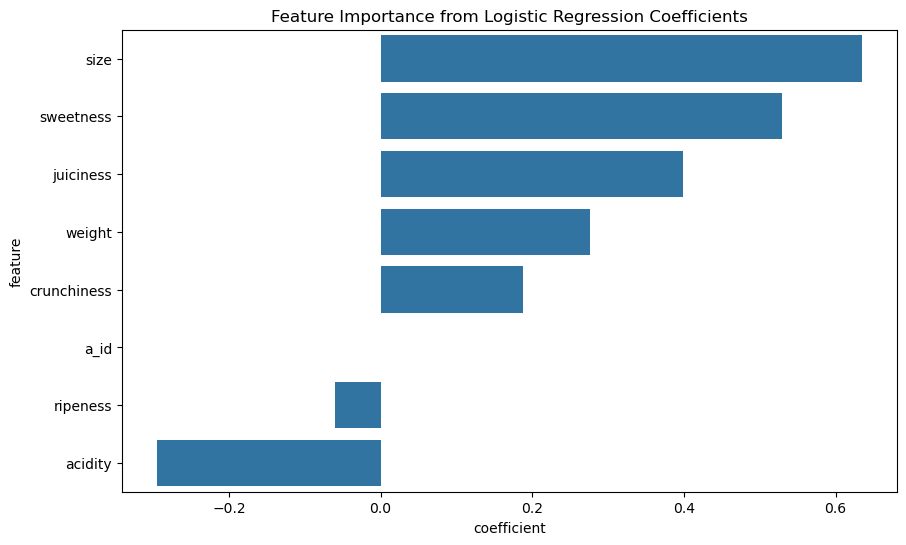

In [1]:
#Fitting a Logistic Regression on the dataset with different values of C and visualize the feature importance of input features

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, roc_auc_score
from sklearn.metrics import f1_score

df = pd.read_csv("../data/apple_quality.csv")
df.head()

df .columns = df.columns.str.lower()
df = df.dropna()

df['acidity'] = df['acidity'].astype('float')
quality_mapping = {
    "good":1,
    "bad":0
}
df['quality'] = df['quality'].map(quality_mapping)

#split the data into train/val/test with 60% and 40% distribution with random_state set to a value i.e 25 here
X = df.drop(columns=['quality'], axis=1)
y = df['quality']
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.6,random_state=25)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=25)

C_values = [0.01,0.1,1.0, 10, 50, 100]

# Dictionaries to store results for training and test data
train_results = {}
val_results = {}
test_results = {}
f1_scores = {}

for c in C_values:
    lr = LogisticRegression(C=c,random_state=25, n_jobs=-1)
    lr.fit(X_train, y_train)

    y_train_pred_proba = lr.predict_proba(X_train)[:,1]
    y_train_pred = lr.predict(X_train)
    
    y_val_pred_proba = lr.predict_proba(X_val)[:,1]
    y_val_pred = lr.predict(X_val)
    
    y_test_pred_proba = lr.predict_proba(X_test)[:,1]
    y_test_pred = lr.predict(X_test)
    
    
    train_precision = precision_score(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train, y_train_pred_proba)
    train_results[c] = {'Precision': train_precision, 'AUC': train_auc}
    
    val_precision = precision_score(y_val, y_val_pred)
    val_auc = roc_auc_score(y_val, y_val_pred_proba)
    val_results[c] = {'Precision': val_precision, 'AUC': val_auc}
    print(f"C={c}: Precision = {val_precision:.3f}, AUC = {val_auc:.3f}")
    
    #f1 score for validation data
    f1 = f1_score(y_val, y_val_pred)
    f1_scores[c] = f1
    print(f"C={c}: F1 Score for validation data = {f1:.3f}")
    
    
    test_precision = precision_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_pred_proba)
    test_results[c] = {'Precision': test_precision, 'AUC': test_auc}
    print(f"C={c}: Precision = {test_precision:.3f}, AUC = {test_auc:.3f}")
    

# get the best values of C for validation data

best_val_C_auc = max(val_results, key=lambda x: val_results[x]['AUC'])
best_val_C_precision = max(val_results, key=lambda x: val_results[x]['Precision'])

print(f"\nBest C for AUC: {best_val_C_auc} with AUC = {val_results[best_val_C_auc]['AUC']:.3f}")
print(f"Best C for Precision: {best_val_C_precision} with Precision = {val_results[best_val_C_precision]['Precision']:.3f}")
    
best_C = max(f1_scores, key=f1_scores.get)
print(f"Best C value based on F1 Score for validation data: {best_C} with F1 Score = {f1_scores[best_C]:.3f}")    

# get the best values of C for test data


best_test_C_auc = max(test_results, key=lambda x: test_results[x]['AUC'])
best_test_C_precision = max(test_results, key=lambda x: test_results[x]['Precision'])

print(f"\nBest C for AUC: {best_test_C_auc} with AUC = {test_results[best_test_C_auc]['AUC']:.3f}")
print(f"Best C for Precision: {best_test_C_precision} with Precision = {test_results[best_test_C_precision]['Precision']:.3f}")


coefficients = lr.coef_[0]

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': coefficients
}).sort_values(by='coefficient', ascending=False)

# Plot feature coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=coef_df)
plt.title("Feature Importance from Logistic Regression Coefficients")
plt.show()

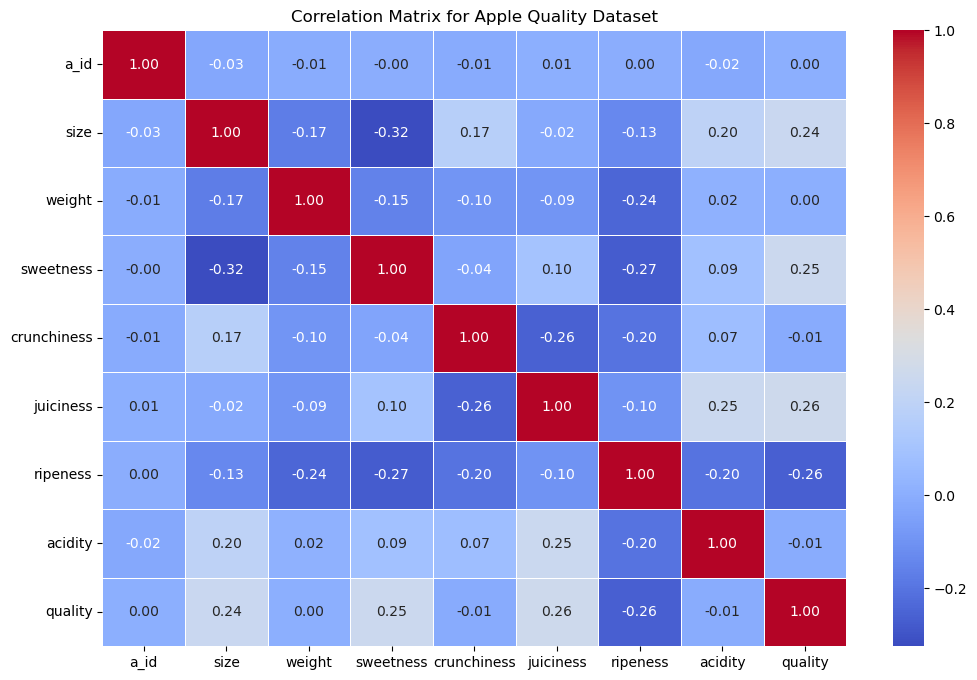

In [2]:
#plot the correlation matrix to visualize the correlation between the input features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your cleaned DataFrame
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap with Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display the plot
plt.title("Correlation Matrix for Apple Quality Dataset")
plt.show()

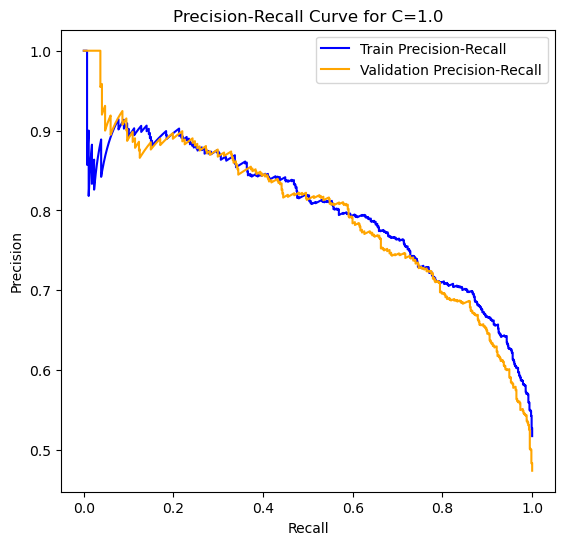

In [3]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Precision-Recall curve
train_precision, train_recall, _ = precision_recall_curve(y_train, y_train_pred_proba)
val_precision, val_recall, _ = precision_recall_curve(y_val, y_val_pred_proba)

# AUC-ROC curve
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_pred_proba)
val_fpr, val_tpr, _ = roc_curve(y_val, y_val_pred_proba)

train_auc = auc(train_fpr, train_tpr)
val_auc = auc(val_fpr, val_tpr)

# Plot Precision-Recall curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(train_recall, train_precision, label="Train Precision-Recall", color="blue")
plt.plot(val_recall, val_precision, label="Validation Precision-Recall", color="orange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for C=1.0")
plt.legend()

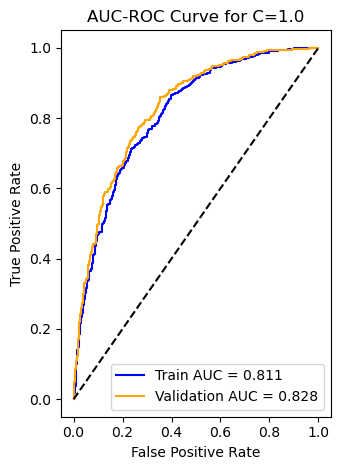

In [4]:
# Plot AUC-ROC curve
plt.subplot(1, 2, 2)
plt.plot(train_fpr, train_tpr, label=f"Train AUC = {train_auc:.3f}", color="blue")
plt.plot(val_fpr, val_tpr, label=f"Validation AUC = {val_auc:.3f}", color="orange")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for C=1.0")
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
#hyperparameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1.0, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

# Define the logistic regression model
log_reg = LogisticRegression(random_state=25, max_iter=500)

# Define GridSearchCV
grid_search = GridSearchCV(
    log_reg,
    param_grid,
    #scoring=make_scorer(roc_auc_score, needs_proba=True),
    scoring=make_scorer(f1_score),
    cv=5,  # 5-fold cross-validation
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
#print("Best AUC Score:", grid_search.best_score_)
print("Best F1-score:", grid_search.best_score_)



Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1-score: 0.754469106460183


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, f1_score
import pickle

# Load the data
df = pd.read_csv("../data/apple_quality.csv")

# Drop unnecessary columns
df.columns = df.columns.str.lower()
df = df.dropna()
df.drop('a_id', axis=1, inplace=True)
df['acidity'] = df['acidity'].astype('float')

# Map 'good' and 'bad' to 1 and 0
quality_mapping = {"good": 1, "bad": 0}
df['quality'] = df['quality'].map(quality_mapping)

# Define features and target variable
X = df.drop(columns=['quality'])
y = df['quality']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

# Set up feature engineering pipeline with scaling and polynomial features
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('log_reg', LogisticRegression(C=0.01, max_iter=1000, penalty='l2', solver='lbfgs'))
])

# Train and transform the train, validation, and test data
final_pipeline.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = final_pipeline.predict(X_val)
y_val_pred_proba = final_pipeline.predict_proba(X_val)[:, 1]

# Evaluate on test set
y_test_pred = final_pipeline.predict(X_test)
y_test_pred_proba = final_pipeline.predict_proba(X_test)[:, 1]

# Print evaluation metrics for validation data
print("\nValidation Results:")
print("Validation F1 Score:", f1_score(y_val, y_val_pred))
print("Validation AUC-ROC:", roc_auc_score(y_val, y_val_pred_proba))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Print evaluation metrics for test data
print("\nTest Results:")
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test AUC-ROC:", roc_auc_score(y_test, y_test_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Save the entire pipeline (scaling, polynomial features, and logistic regression model)
with open('lr_apple_quality_model.pkl', 'wb') as file:
    pickle.dump(final_pipeline, file)

print("The entire pipeline has been saved as 'lr_apple_quality_model.pkl'")



Validation Results:
Validation F1 Score: 0.8649350649350649
Validation AUC-ROC: 0.9504152448815736
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       424
           1       0.85      0.89      0.86       376

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800


Test Results:
Test F1 Score: 0.8709288299155609
Test AUC-ROC: 0.9368795478982772
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       394
           1       0.85      0.89      0.87       406

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800

The entire pipeline has been saved as 'lr_apple_quality_model.pkl'


/tmp/ipykernel_17549/838878650.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, bins=15)
/tmp/ipykernel_17549/838878650.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, bins=15)
/tmp/ipykernel_17549/838878650.py:8: UserWarning: 

`distplot` is a 

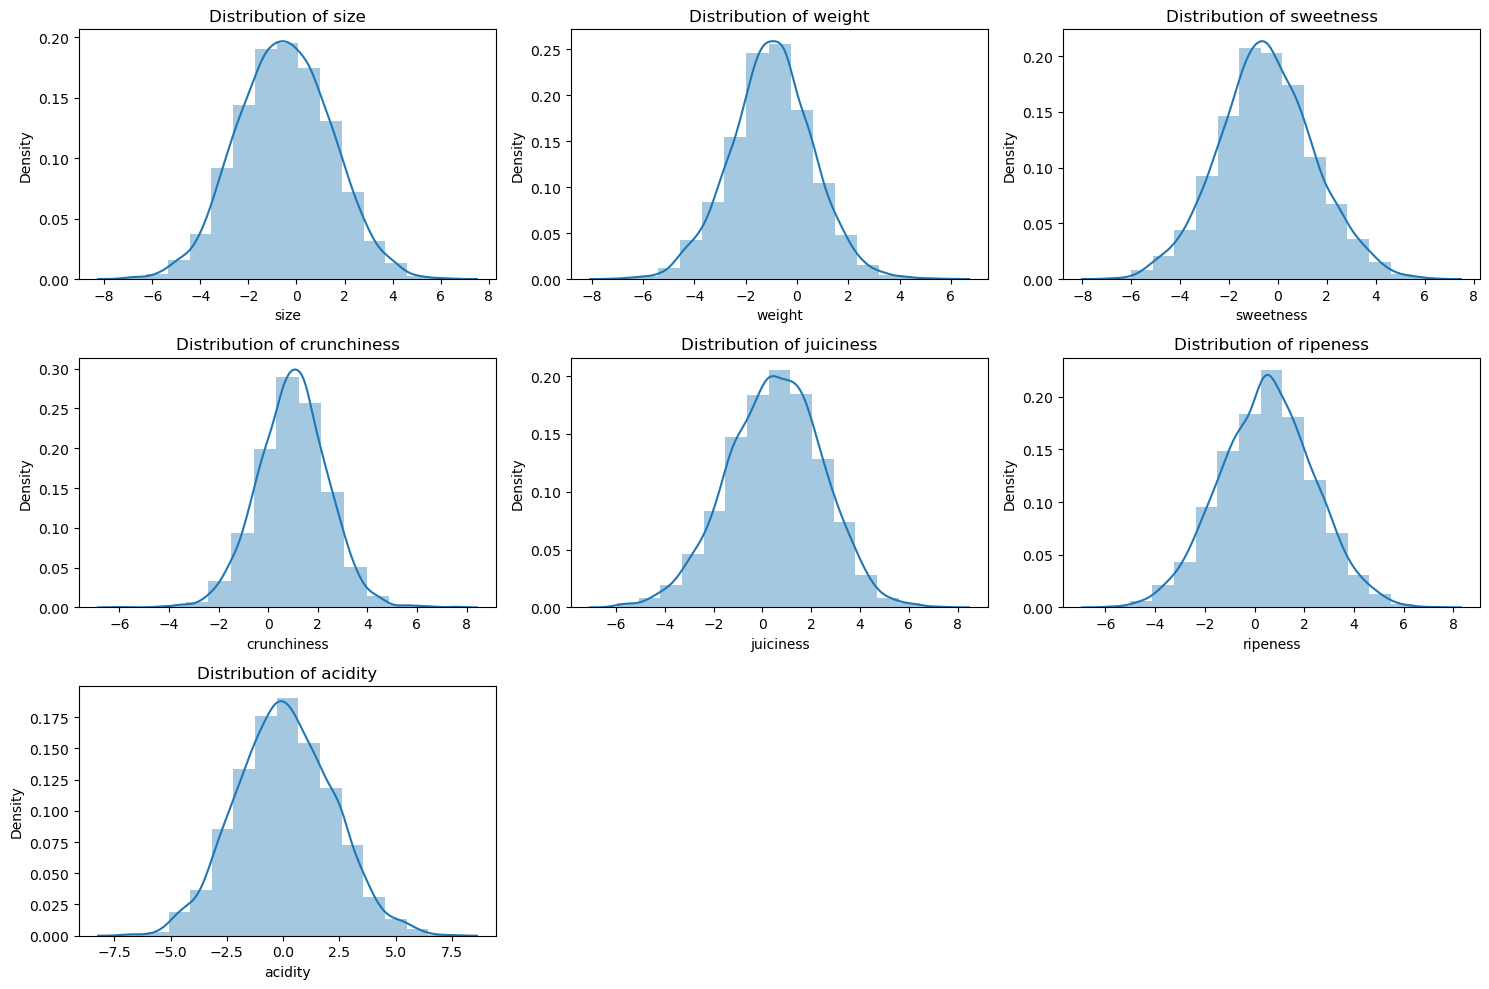

In [7]:
#visualize the parameters post scaling
import seaborn as sns
#column distribution
# Set up the plot grid
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude 'quality' for distribution
    plt.subplot(3, 3, i)  # Adjust grid based on the number of features
    sns.distplot(df[column], kde=True, bins=15)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()